In [4]:
import numpy as np
import matplotlib.pyplot as plt
import os
import lmdb
from itertools import product
from camelxstyle import camel2d
import tqdm

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


###### Description

For a ease of processing, we convert numpy files to lmdb database file

In [5]:
data_dir = "/home/dh689/scratch/CAMELS/2D_maps/data"
def data_path(x):
    return os.path.join(data_dir, x)


In [6]:
fields = ["Mtot"]
sims = ["IllustrisTNG", "SIMBA"]
sets = ["LH"]

overwrite = False

for field_idx, sim_idx, set_idx in tqdm.tqdm(product(fields, sims, sets)):
    input_file = data_path(f"Maps_{field_idx}_{sim_idx}_{set_idx}_z=0.00.npy")
    output_file = data_path(f"Maps_{field_idx}_{sim_idx}_{set_idx}_z=0.00")
    
    if not os.path.exists(output_file) or overwrite:
        print(f"converting {input_file} to {output_file}")
        
        input_data = np.load(input_file)
        N, ny, nx = input_data.shape
        
        stamp_byte = np.zeros((ny, nx), dtype=input_data.dtype).nbytes
        map_size = stamp_byte*N*10
        
        DB = lmdb.open(output_file, map_size=map_size)
        with DB.begin(write=True) as txn:
            for i in range(N):
                if i % 1000 == 0:
                    print(f"processing {i}/{N}")
                str_idx = f'{i:08}'
                txn.put(str_idx.encode('ascii'), input_data[i].tobytes())

        del input_data, DB


0it [00:00, ?it/s]

converting /home/dh689/scratch/CAMELS/2D_maps/data/Maps_Mtot_IllustrisTNG_LH_z=0.00.npy to /home/dh689/scratch/CAMELS/2D_maps/data/Maps_Mtot_IllustrisTNG_LH_z=0.00
processing 0/15000
processing 1000/15000
processing 2000/15000
processing 3000/15000
processing 4000/15000
processing 5000/15000
processing 6000/15000
processing 7000/15000
processing 8000/15000
processing 9000/15000
processing 10000/15000
processing 11000/15000
processing 12000/15000
processing 13000/15000
processing 14000/15000


1it [00:09,  9.61s/it]

converting /home/dh689/scratch/CAMELS/2D_maps/data/Maps_Mtot_SIMBA_LH_z=0.00.npy to /home/dh689/scratch/CAMELS/2D_maps/data/Maps_Mtot_SIMBA_LH_z=0.00
processing 0/15000
processing 1000/15000
processing 2000/15000
processing 3000/15000
processing 4000/15000
processing 5000/15000
processing 6000/15000
processing 7000/15000
processing 8000/15000
processing 9000/15000
processing 10000/15000
processing 11000/15000
processing 12000/15000
processing 13000/15000
processing 14000/15000


2it [00:18,  9.04s/it]


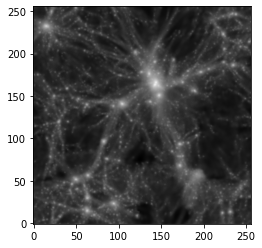

Value of the parameters for this map
Omega_m: 0.30900
sigma_8: 0.97900
A_SN1:   3.11234
A_AGN1:  1.12194
A_SN2:   0.66850
A_AGN2:  0.53182


In [7]:
## testing
sim_idx = 10
DB = camel2d.Camel2DField(data_dir, "Mtot", "IllustrisTNG", "LH")
plt.imshow(np.log10(DB[sim_idx][0]),cmap=plt.get_cmap('binary_r'), origin='lower', interpolation='bicubic')
plt.show()
DB.describe(sim_idx)